<a href="https://colab.research.google.com/github/disha-ramchandani/Mini-Projects/blob/Machine-Learning/Cartoon_Picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

LOAD IMAGE

In [43]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

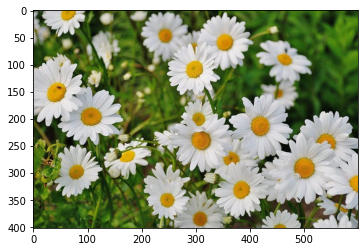

In [115]:
filename = '/content/daisy-flower-spring-marguerite-67857.jpeg'
image = read_file(filename)

GETTING THE EDGES

In [116]:
def edge_marking(img, line_size, blur_val):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  grayblur = cv2.medianBlur(gray, blur_val)

  edge = cv2.adaptiveThreshold(grayblur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, line_size, blur_val)
  
  return edge

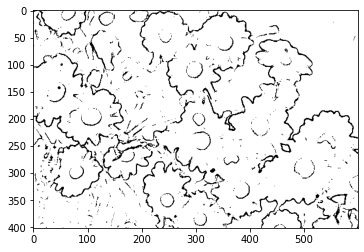

In [125]:
line, blur = 5, 7
edge_img = edge_marking(image, line, blur)

plt.imshow(edge_img, cmap = 'gray')

SELECTING COLOUR PALATTE

In [118]:
def colour_quantifying(img, k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #Implementing K-Means Clustering Algorithm 

  ret, label, centre = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centre = np.uint8(centre)

  result = centre[label.flatten()]
  result = result.reshape(img.shape)

  return result

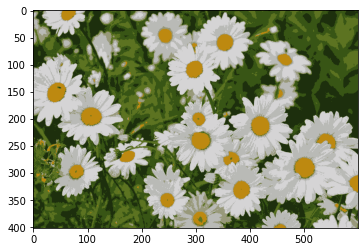

In [120]:
img = colour_quantifying(image, k=7)

plt.imshow(img)

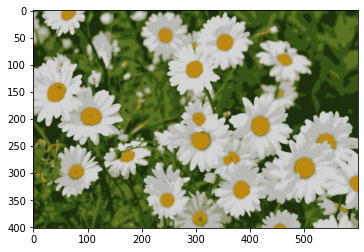

In [122]:
# Reducing noise by blurring image

blurred_img = cv2.bilateralFilter(img, d=5, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred_img)

In [123]:
def cartoon_img():
  c = cv2.bitwise_and(blurred_img, blurred_img, mask = edge_img)

  plt.imshow(image)
  plt.title("Original Image")
  plt.show()
  
  plt.imshow(c)
  plt.title("Cartoon Image")
  plt.show()

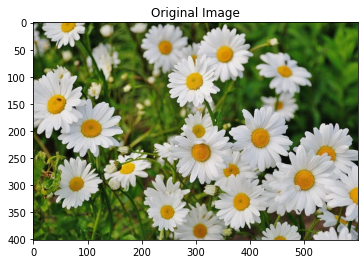

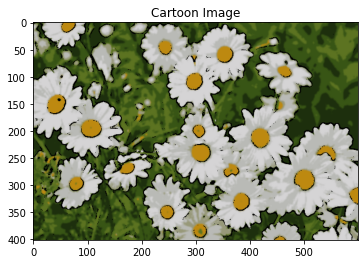

In [126]:
cartoon_img()